<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/03_Unsupervised_modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

## **1.Librairies**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
!pip install pyLDAvis==2.1.2

## **2.Data**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
questions = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.iloc[:, 1:]

tags = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/tags.csv')
tags = tags.iloc[:, 1:]

In [8]:
questions

,Question
0,pandas pandas list dataframe object
1,php string
2,json performance json function select json joi...
3,java java class class static string join join ...
4,stream video browser stream video browser vide...
...,...
39995,scala scala configuration module java scala ty...
39996,flutter function button build function function
39997,routing url browser class import dom class con...
39998,python post twitter post python import import ...


In [9]:
tags

,Tag_st
0,python pandas
1,php
2,performance postgresql
3,java multithreading
4,flash video stream
...,...
39995,scala intellij-idea
39996,dart flutter
39997,reactjs webpack redux
39998,python twitter


## **2.1.String to List**

In [10]:
questions['Question'] = questions['Question'].apply(lambda text: str(text).split())
tags['Tag_st'] = tags['Tag_st'].apply(lambda text: str(text).split())

In [11]:
questions = questions['Question'] 
questions.head(10)

0            [pandas, pandas, list, dataframe, object]
1                                        [php, string]
2    [json, performance, json, function, select, js...
3    [java, java, class, class, static, string, joi...
4    [stream, video, browser, stream, video, browse...
5    [pandas, pandas, date, indexing, date, date, d...
6                                           [dns, php]
7    [php, ide, constants, reflection, web, php, ph...
8                                            [process]
9    [jquery, javascript, jquery, javascript, jquer...
Name: Question, dtype: object

In [12]:
tags = tags['Tag_st'] 
tags.head(10)

0             [python, pandas]
1                        [php]
2    [performance, postgresql]
3       [java, multithreading]
4       [flash, video, stream]
5                     [pandas]
6            [php, mysql, dns]
7                        [php]
8           [ios, objective-c]
9         [javascript, jquery]
Name: Tag_st, dtype: object

## **3.Modelization LDA**

## **3.1.Dictionary, Indexation and frequency of words by question**

In [13]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [14]:
len(dictionary)

358

In [15]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 5), (10, 2), (11, 1), (12, 1), (13, 1), (14, 6)],
 [(5, 1), (8, 2), (15, 4), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1)],
 [(21, 3),
  (22, 2),
  (23, 5),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 11),
  (28, 6),
  (29, 1)],
 [(3, 2), (6, 4), (30, 1)],
 [(4, 1), (31, 1)],
 [(4, 5),
  (7, 1),
  (15, 1),
  (29, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2)],
 [(38, 1)],
 [(7, 1), (26, 2), (39, 3)],
 [(40, 1)],
 [(13, 1), (41, 1), (42, 1)],
 [(9, 3), (14, 1), (43, 1), (44, 1), (45, 1)],
 [(25, 1), (32, 2)],
 [(14, 1), (41, 4), (46, 3), (47, 4)],
 [(2, 1)],
 [(15, 2), (21, 1), (29, 1), (48, 1), (49, 1), (50, 1), (51, 2)],
 [(5, 1), (15, 1), (17, 6), (43, 3), (52, 2)],
 [(2, 3),
  (3, 2),
  (5, 4),
  (6, 2),
  (13, 4),
  (14, 1),
  (16, 1),
  (22, 16),
  (42, 1),
  (53, 2),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 22),
  (58, 3),
  (59, 12),
  (60, 1),
  (61, 3),
  (62, 1)],
 [(1, 1), (6

In [16]:
len(corpus)

40000

In [17]:
print(dictionary.get(0))
print(dictionary.get(3))
print(dictionary.get(15))

dataframe
pandas
class


## **3.2.Optimal number of topics**

In [18]:
from gensim.models import CoherenceModel

### **Coherence score according to the number of topics** 

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values =[]
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions, start=2, limit=40, step=2) 

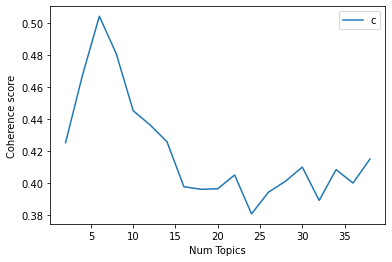

In [21]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### **Optimal number of topics = 6**

In [22]:
for nt, cs in zip(x, coherence_values):
  print("Num Topics =", nt, "is having Coherence score of", round(cs, 4))

Num Topics = 2 is having Coherence score of 0.4251
Num Topics = 4 is having Coherence score of 0.4673
Num Topics = 6 is having Coherence score of 0.5042
Num Topics = 8 is having Coherence score of 0.4807
Num Topics = 10 is having Coherence score of 0.4451
Num Topics = 12 is having Coherence score of 0.4362
Num Topics = 14 is having Coherence score of 0.4257
Num Topics = 16 is having Coherence score of 0.3976
Num Topics = 18 is having Coherence score of 0.396
Num Topics = 20 is having Coherence score of 0.3963
Num Topics = 22 is having Coherence score of 0.4049
Num Topics = 24 is having Coherence score of 0.3806
Num Topics = 26 is having Coherence score of 0.3942
Num Topics = 28 is having Coherence score of 0.401
Num Topics = 30 is having Coherence score of 0.4099
Num Topics = 32 is having Coherence score of 0.3891
Num Topics = 34 is having Coherence score of 0.4083
Num Topics = 36 is having Coherence score of 0.3999
Num Topics = 38 is having Coherence score of 0.4149


In [23]:
lda = gensim.models.ldamodel.LdaModel

## **3.3.LDA with 6 topics**

In [24]:
ldamodel = lda(corpus, num_topics=6, id2word = dictionary, passes=50)

### **keywords and weights**

In [25]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=8, num_words=10))
print("LDA model is: \n")
for idx, topic in ldamodel.print_topics(num_topics=6, num_words=5):
    print("Topic: {} \nTags: {}".format(idx, topic))
    #print("\n")

LDA model is: 

Topic: 0 
Tags: 0.232*"string" + 0.214*"android" + 0.111*"list" + 0.060*"layout" + 0.051*"static"
Topic: 1 
Tags: 0.174*"function" + 0.108*"text" + 0.069*"html" + 0.062*"input" + 0.055*"php"
Topic: 2 
Tags: 0.331*"java" + 0.055*"xml" + 0.042*"spring" + 0.041*"apache" + 0.037*"exception"
Topic: 3 
Tags: 0.168*"c" + 0.062*"python" + 0.055*"image" + 0.050*"file" + 0.041*"r"
Topic: 4 
Tags: 0.154*"class" + 0.079*"object" + 0.061*"set" + 0.051*"null" + 0.046*"time"
Topic: 5 
Tags: 0.152*"file" + 0.055*"url" + 0.052*"web" + 0.048*"path" + 0.046*"json"


### **Creation of label tags**

In [33]:
def main_topics(model=ldamodel, corpus=corpus, questions=questions, tags=tags):

  #Output Initialization
  topics_df = pd.DataFrame()

  #Main topic  for each question
  for i, row in enumerate(model[corpus]):

    #row
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    #Main topic, Importance, Keywords for each question
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0: #Main topic
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  topics_df.columns = ['Main_Topic', 'Importance', 'Topic_Keywords']

  #Concatenate questions, topic outputs and true tags
  contents = pd.Series(questions)
  tags = pd.Series(tags)
  topics_df = pd.concat([topics_df, contents, tags], axis=1)
  return(topics_df)

df_topic_keywords = main_topics(model=ldamodel, corpus=corpus, questions=questions, tags=tags)

df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns =  ['Question_No', 'Main_Topic', 'Importance', 'Tags_pred', 'Question', 'Tags_True'] 


In [34]:
df_dominant_topic.head(10)

,Question_No,Main_Topic,Importance,Tags_pred,Question,Tags_True
0,0,4.0,0.8603,"class, object, set, null, time, select, model,...","[pandas, pandas, list, dataframe, object]","[python, pandas]"
1,1,0.0,0.3889,"string, android, list, layout, static, r, null...","[php, string]",[php]
2,2,4.0,0.6325,"class, object, set, null, time, select, model,...","[json, performance, json, function, select, js...","[performance, postgresql]"
3,3,2.0,0.4650,"java, xml, spring, apache, exception, build, g...","[java, java, class, class, static, string, joi...","[java, multithreading]"
4,4,1.0,0.7476,"function, text, html, input, php, button, clas...","[stream, video, browser, stream, video, browse...","[flash, video, stream]"
5,5,4.0,0.7708,"class, object, set, null, time, select, model,...","[pandas, pandas, date, indexing, date, date, d...",[pandas]
6,6,1.0,0.3889,"function, text, html, input, php, button, clas...","[dns, php]","[php, mysql, dns]"
7,7,1.0,0.4072,"function, text, html, input, php, button, clas...","[php, ide, constants, reflection, web, php, ph...",[php]
8,8,3.0,0.5825,"c, python, image, file, r, windows, time, c++,...",[process],"[ios, objective-c]"
9,9,1.0,0.8810,"function, text, html, input, php, button, clas...","[jquery, javascript, jquery, javascript, jquer...","[javascript, jquery]"


In [35]:
def first_words(str):
    res = str.split(', ')
    fir = res[0:3]
    return(fir)

In [36]:
df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(first_words)

In [37]:
df_dominant_topic.head(100)

,Question_No,Main_Topic,Importance,Tags_pred,Question,Tags_True
0,0,4.0,0.8603,"[class, object, set]","[pandas, pandas, list, dataframe, object]","[python, pandas]"
1,1,0.0,0.3889,"[string, android, list]","[php, string]",[php]
2,2,4.0,0.6325,"[class, object, set]","[json, performance, json, function, select, js...","[performance, postgresql]"
3,3,2.0,0.4650,"[java, xml, spring]","[java, java, class, class, static, string, joi...","[java, multithreading]"
4,4,1.0,0.7476,"[function, text, html]","[stream, video, browser, stream, video, browse...","[flash, video, stream]"
...,...,...,...,...,...,...
95,95,0.0,0.4540,"[string, android, list]","[spring, spring, migration, spring, class, sta...","[java, spring, mongodb, spring-boot]"
96,96,3.0,0.9306,"[c, python, image]","[algorithm, numpy, scipy, algorithm, scipy, nu...","[python, algorithm, numpy, scipy]"
97,97,0.0,0.5895,"[string, android, list]","[service, service, list, service, list, list, ...","[c#, asp.net-core, dependency-injection, .net-..."
98,98,5.0,0.4297,"[file, url, web]","[grails, mongodb, grails, mongodb, set, groovy...","[mongodb, grails]"


In [ ]:
#def remove_space(body):
  #return ''.join(str(body).split())

In [ ]:
#df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(remove_space)

In [ ]:
#df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(lambda text: str(text).split())

In [38]:
df_tags = df_dominant_topic[['Tags_True', 'Tags_pred']]
df_tags

,Tags_True,Tags_pred
0,"[python, pandas]","[class, object, set]"
1,[php],"[string, android, list]"
2,"[performance, postgresql]","[class, object, set]"
3,"[java, multithreading]","[java, xml, spring]"
4,"[flash, video, stream]","[function, text, html]"
...,...,...
39995,"[scala, intellij-idea]","[java, xml, spring]"
39996,"[dart, flutter]","[function, text, html]"
39997,"[reactjs, webpack, redux]","[file, url, web]"
39998,"[python, twitter]","[file, url, web]"


### **jaccard similarity score**

In [40]:
from sklearn.externals import joblib
from joblib import load, dump

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [41]:
dict_tags_500 = joblib.load('/content/drive/My Drive/CentraleSupelec_OCR/P6/list_tag_key_500.joblib')
print(dict_tags_500)

{'service', 'programming-languages', 'controls', 'redux', 'orm', 'language-lawyer', 'mercurial', 'c++', 'enums', 'websocket', 'dictionary', 'd3.js', 'autocomplete', 'stream', 'flexbox', 'spring-mvc', 'c++14', 'encoding', 'c', 'dll', 'loops', 'authentication', 'eclipse-plugin', 'redirect', 'matplotlib', 'utf-8', 'jakarta-ee', 'drupal', 'gradle', 'aws-lambda', 'safari', 'database-design', 'image', 'wordpress', 'amazon-web-services', 'junit', 'macos', 'jestjs', 'serialization', 'canvas', 'ruby', 'model-view-controller', 'iis-7', 'batch-file', 'data-structures', 'graphics', 'xamarin.forms', 'initialization', 'version-control', 'vb.net', 'animation', 'c++11', 'facebook-graph-api', 'apache-spark-sql', 'graph', 'browser', 'maven-2', 'dart', 'unicode', 'xaml', 'api', 'openssl', 'laravel-5', 'dns', 'jquery-ui', 'stl', 'machine-learning', 'search', 'functional-programming', 'devise', 'uitableview', 'java-8', 'binary', 'redis', 'vba', 'list', 'object', 'asp.net-mvc', 'compiler-construction', 'and

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500))
df_tags_num_true = mlb.fit_transform(df_tags['Tags_True'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['nan'] will be ignored
  .format(sorted(unknown, key=str)))


In [43]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500 ))
df_tags_num_pred = mlb.fit_transform(df_tags['Tags_pred'])

In [44]:
from sklearn.metrics import jaccard_score, make_scorer, jaccard_similarity_score
from gensim.matutils import jaccard

In [45]:
lda_jss_score = jaccard_similarity_score(df_tags_num_true, df_tags_num_pred)
print(f"Score: {lda_jss_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.03984863095238095


In [46]:
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [47]:
lda_visualisation = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualisation)

## **4.Word Embedding (Optional)**

In [ ]:
wordvec = Word2Vec(questions, min_count=1)

In [ ]:
print('wordvec:', wordvec)

wordvec: Word2Vec(vocab=358, size=100, alpha=0.025)


In [ ]:
words = list(wordvec.wv.vocab)

In [ ]:
print("\nwords", words)


words ['pandas', 'list', 'dataframe', 'object', 'php', 'string', 'json', 'performance', 'function', 'select', 'join', 'date', 'time', 'loops', 'set', 'java', 'class', 'static', 'security', 'exception', 'jvm', 'stream', 'video', 'browser', 'flash', 'http', 'file', 'javascript', 'input', 'web', 'indexing', 'dns', 'ide', 'constants', 'reflection', 'c', 'c++', 'methods', 'process', 'jquery', 'nan', 'linux', 'database', 'caching', 'reference', 'api', 'mysql', 'text', 'button', 'selenium', 'firefox', 'r', 'null', 'import', 'module', 'python', 'post', 'pip', 'build', 'search', 'regex', 'path', 'sql', 'memory', 'bash', 'curl', 'gcc', 'terminal', 'apache', 'hadoop', 'shell', 'spring', 'xcode', 'image', 'configuration', 'angular', 'email', 'constructor', 'tkinter', 'dynamic', 'variables', 'haskell', 'parameters', 'integer', 'android', 'dom', 'html', 'model', 'hibernate', 'github', 'wpf', 'xml', 'url', 'hash', 'pointers', 'session', 'redirect', 'windows', 'ruby', 'rspec', 'scala', 'sorting', 'la

In [ ]:
print("\nwordvec['function'] :", wordvec['function'])


wordvec['function'] : [-1.3535756  -0.8204511   0.68864733 -0.16536057  0.00223879  0.78682876
 -0.24000445  0.9216206  -0.18961848 -0.70993924 -0.80165666  1.4962957
 -0.98293     0.76356894  0.1733149   0.90402     0.07002867 -0.8486991
  0.15374473 -0.75717604 -0.2819633  -0.0144824  -1.0097573   1.2801421
 -0.64327174  0.8767355  -0.36254895 -0.36250913  0.05994253  0.18625757
 -0.46296918  0.46520585  0.25016987  0.34849885 -0.26926696 -0.93819094
 -0.7142148  -0.75789624  0.7697302  -1.2534705   1.1334008  -0.40228906
  0.08499686  0.43784386 -0.03546901  0.75041837 -0.4228739  -0.8731852
 -0.5685059  -1.1262896   1.0142959  -0.8630402  -0.5926528  -0.09314094
  0.11164702  0.815288    0.42165363 -0.12137885 -0.34120116  0.35731724
 -0.04432664 -0.28375757 -0.3588576  -0.2955608  -0.7711969   0.48777926
  0.05904024 -0.5902171  -0.30408707 -0.44318113 -0.19449243  1.6905779
  0.6805388  -0.07980315  0.17398508 -0.23699121 -0.69216603 -0.83482474
  1.0233809  -0.12098429 -1.13371

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
wordvec.save('wordvec.bin')

/usr/local/lib/python3.7/dist-packages/gensim/utils.py:589: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  if hasattr(self, attrib):
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:590: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  asides[attrib] = getattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:591: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  delattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/

In [ ]:
new_wordvec = Word2Vec.load('wordvec.bin')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:488: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  setattr(self, attrib, None)


In [ ]:
print("\nloaded wordvec", new_wordvec)


loaded wordvec Word2Vec(vocab=358, size=100, alpha=0.025)


In [ ]:
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [ ]:
X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the nump

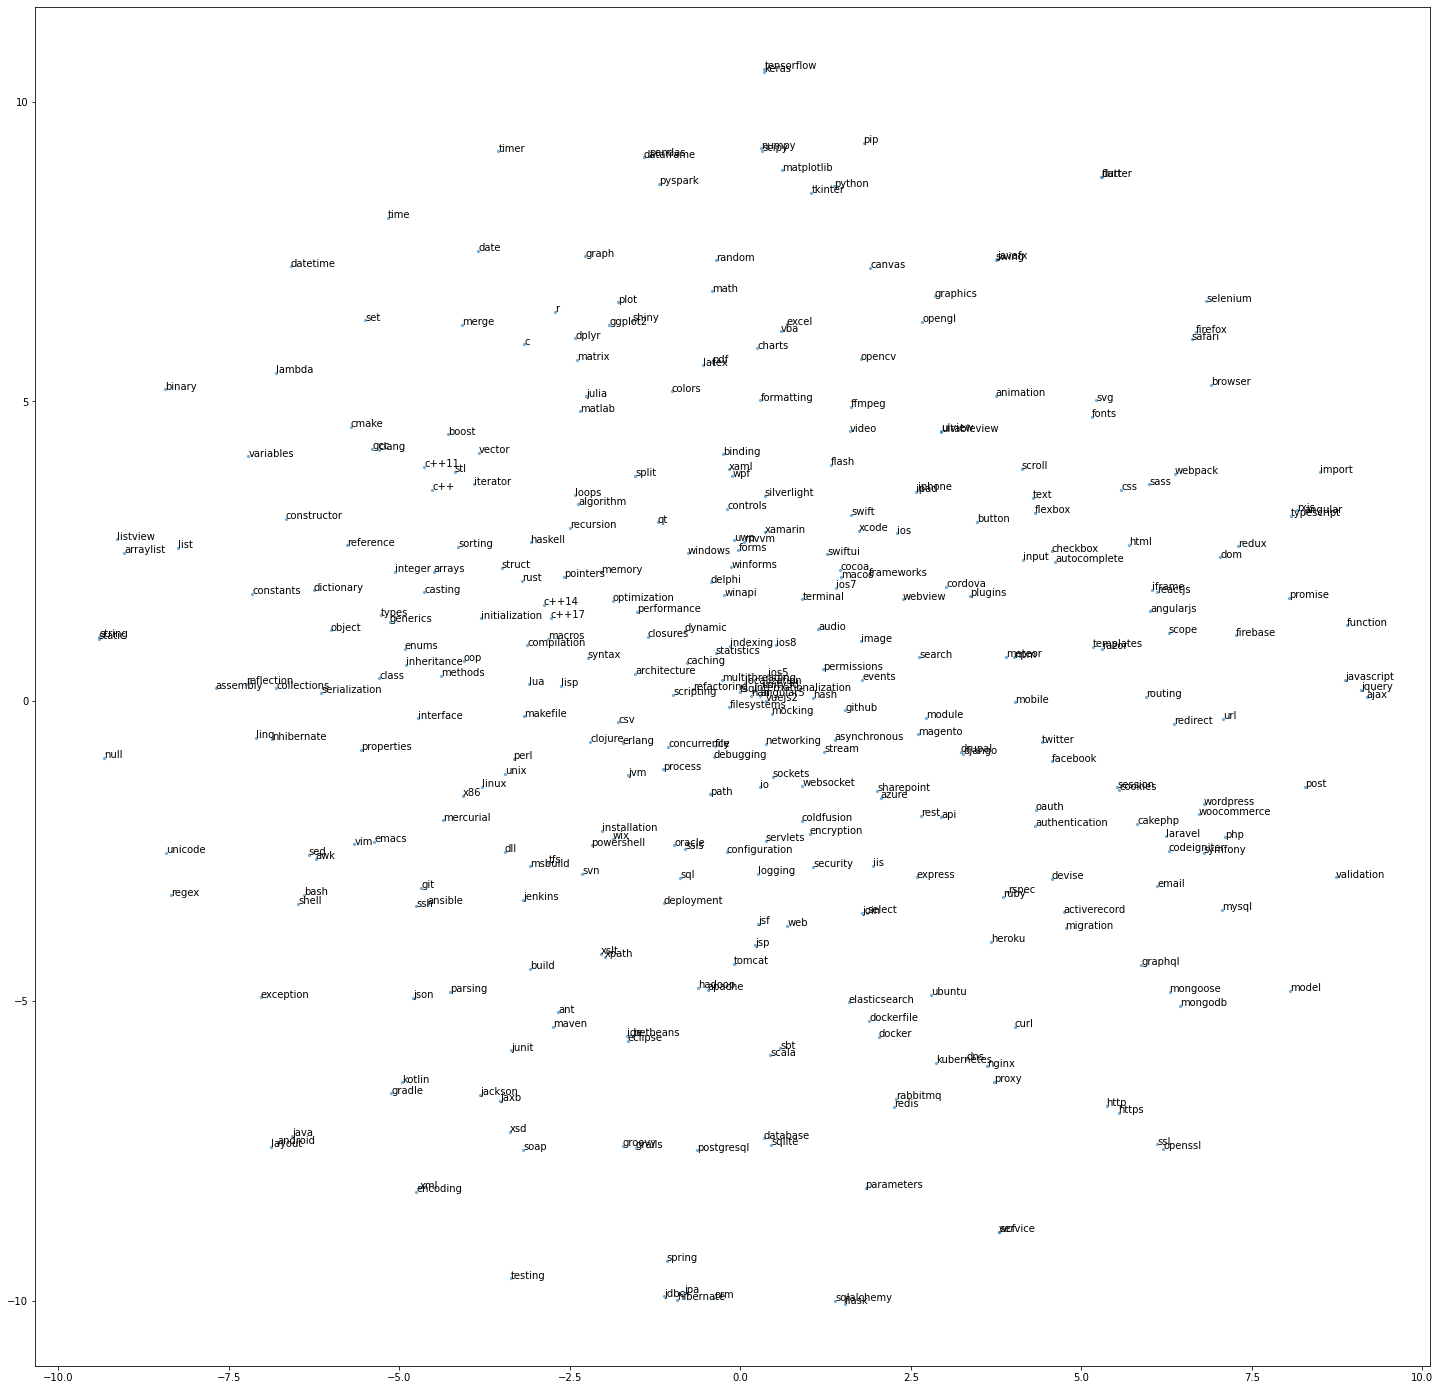

In [ ]:
plt.figure(figsize=(25,25))
pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()